### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [600]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [603]:
data = pd.read_csv('data/coupons.csv')

In [605]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [608]:
#Gathering number of rows and columns
data.shape

(12684, 26)

In [610]:
#Data type
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [612]:
# Rename the column 'passanger' to 'passenger'
data = data.rename(columns={'passanger': 'passenger'})

In [614]:
# Find columns with NaN values
nan_columns = data.columns[data.isnull().any()]
print("Columns with NaN values:", nan_columns.tolist())

Columns with NaN values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [616]:
# Find how many NaN in the column car as this column does not make sense
car_count = data['car'].isna().sum()
print(car_count)

12576


3. Decide what to do about your missing data -- drop, replace, other...

In [619]:
# Replace NaN values in 'CarryAway' with 0
data['CarryAway'] = data['CarryAway'].fillna(0)

In [621]:
# Replace NaN values in 'CoffeeHouse' with 0
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(0)

In [623]:
# Replace NaN values in 'Bar' with 0
data['Bar'] = data['Bar'].fillna(0)

In [624]:
# Replace NaN values in 'RestaurantLessThan20' with 0
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(0)

In [625]:
# Replace NaN values in 'Restaurant20To50' with 0
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(0)

In [629]:
# As 'age' column has object instead of a float, replace '50plus' and 'below21' values in 'age' column with a random number 55 and 20 respectively

data['age'] = data['age'].replace({'50plus': '55', 'below21': '20'})
data['age'] = data['age'].astype(float)

In [631]:
# Drop 'car' column
data = data.drop('car', axis=1)

4. What proportion of the total observations chose to accept the coupon?



In [634]:
data['Y'].value_counts(normalize=True) * 100

Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

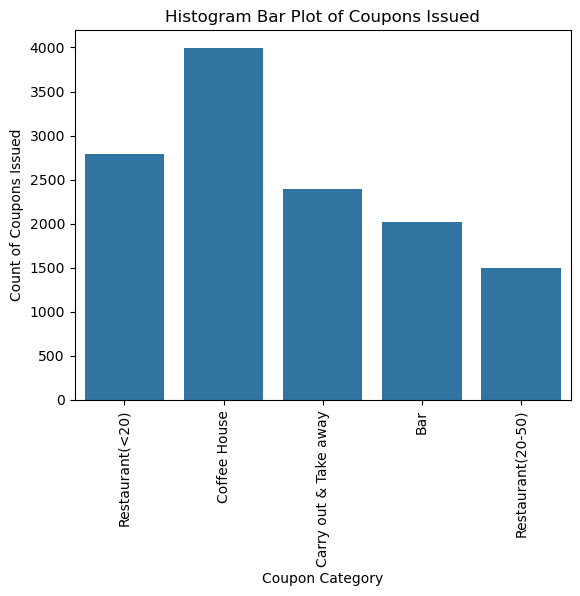

In [677]:
#Plotting in Seaborn the coupons issued


# count plot on single categorical variable
ax = sns.countplot(x ='coupon', data = data)

ax.set_title('Histogram Bar Plot of Coupons Issued')
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Coupon Category', ylabel='Count of Coupons Issued') 

#save image
plt.savefig('images/couponsAccepted')

# Show the plot
plt.show()

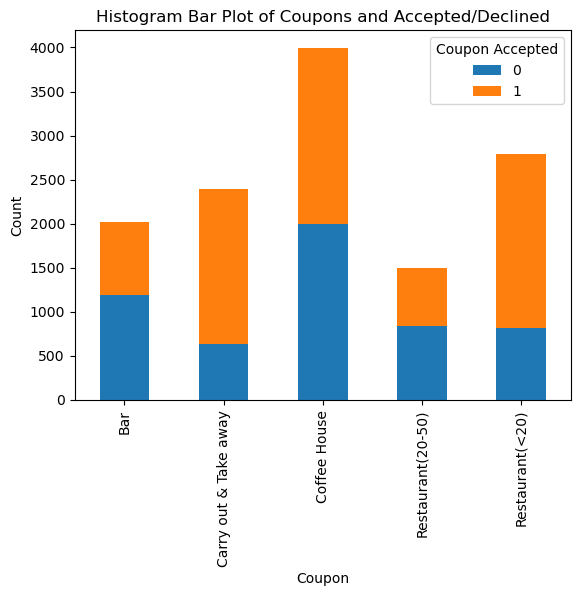

In [593]:
# Calculate value counts for each category and subcategory combination
counts = data.groupby('coupon')['Y'].value_counts().unstack(fill_value=0)

# Create the stacked bar plot
counts.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Histogram Bar Plot of Coupons and Accepted/Declined')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted')
plt.xticks(rotation=90)

#save image
plt.savefig('images/couponsAccepted')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

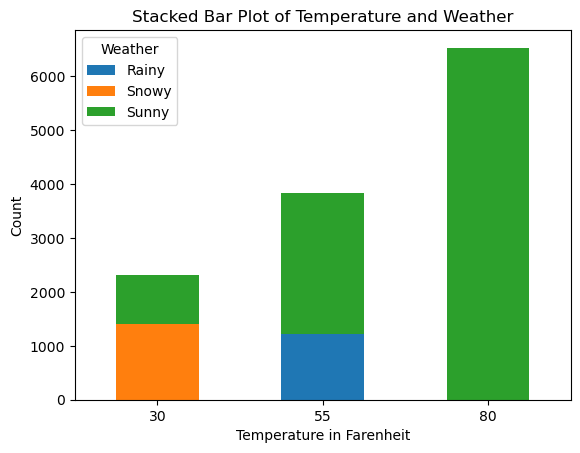

In [595]:
## Calculate value counts for each category and subcategory combination
weatherCounts = data.groupby('temperature')['weather'].value_counts().unstack(fill_value=0)

# Create the stacked bar plot
weatherCounts.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Stacked Bar Plot of Temperature and Weather')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Count')
plt.legend(title='Weather')
plt.xticks(rotation=0)

#save image
plt.savefig('images/temperatureWeather')

# Show the plot
plt.show()

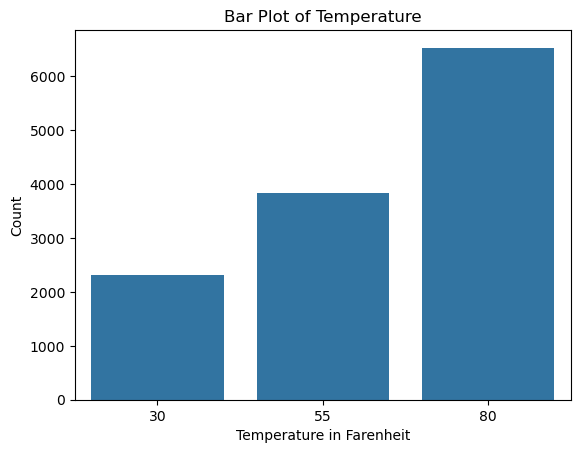

In [675]:
#Plotting in Seaborn the temperature


# count plot on single categorical variable
ax = sns.countplot(x ='temperature', data = data)

ax.set_title('Bar Plot of Temperature')
ax.set(xlabel='Temperature in Farenheit', ylabel='Count') 

#save image
plt.savefig('images/temperatureWeather')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [679]:

barData = data[data['coupon'] == 'Bar']

barData.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21.0,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21.0,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21.0,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21.0,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [682]:
barData['Y'].value_counts(normalize=True) * 100

Y
0    58.998513
1    41.001487
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [685]:
# Get unique values from 'Bar'
unique_values_Bar = barData['Bar'].unique()
print(unique_values_Bar)

['never' 'less1' '1~3' 'gt8' 0 '4~8']


In [687]:
# Percentage of drivers who accepted coupons where bar visits are less than 3 to those more
less_than_3 = ['never', 0, 'less1', '1~3']
barVisits = barData[barData['Bar'].isin(less_than_3)]['Y'].isin([1]).value_counts(normalize=True) * 100
print(barVisits)

Y
False    62.926293
True     37.073707
Name: proportion, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [690]:
# Percentage of drivers who accepted coupons where bar visits are more than 1 and aged over 25
more_than_1 = ['1~3', 'gt8', '4~8']
condition = barData.loc[(barData['Bar'].isin(more_than_1)) & (barData['age'] > 25)]
barVisits25 = condition['Y'].isin([1]).value_counts(normalize=True) * 100
print(barVisits25)

Y
True     69.52381
False    30.47619
Name: proportion, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [693]:
# Unique values in 'occupation' column
uniqueOccupations = barData['occupation'].unique()
uniqueOccupations

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [695]:
# Unique values in 'passenger' column
uniquePassenger = barData['passenger'].unique()
uniquePassenger

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [697]:
# Percentage of drivers who accepted coupons where bar visits are more than 1, passengers are not kids,
#and occupations other than farming, fishing, or forestry
more_than_1 = ['1~3', 'gt8', '4~8']
condition = barData.loc[(barData['Bar'].isin(more_than_1)) & (barData['passenger'] != 'Kid(s)') & (barData['occupation'] != 'Farming Fishing & Forestry')]
barVisitsCondition3 = condition['Y'].isin([1]).value_counts(normalize=True) * 100
print(barVisitsCondition3)

Y
True     71.324864
False    28.675136
Name: proportion, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [700]:
# Unique values in 'maritalStatus' column
maritalStatus = data['maritalStatus'].unique()
maritalStatus

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [702]:
#Percentage of drivers who accepted the coupon who go to bars more than once a month,
#had passengers that were not a kid, and were not widowed
more_than_1 = ['1~3', 'gt8', '4~8']
conditionOne = data.loc[(data['Bar'].isin(more_than_1)) & (data['passenger'] != 'Kid(s)') & (data['maritalStatus'] != 'Widowed')]
condition1 = conditionOne['Y'].isin([1]).value_counts(normalize=True) * 100
print(condition1)

Y
True     62.310606
False    37.689394
Name: proportion, dtype: float64


In [704]:
#Percentage of drivers who accepted the coupon who go to bars more than once a month and are under the age of 30
more_than_1 = ['1~3', 'gt8', '4~8']
conditionTwo = data.loc[(data['Bar'].isin(more_than_1)) & (data['age'] < 30)]
condition2 = conditionTwo['Y'].isin([1]).value_counts(normalize=True) * 100
print(condition2)

Y
True     62.808099
False    37.191901
Name: proportion, dtype: float64


In [706]:
# Unique values in 'RestaurantLessThan20'
RestaurantLessThan20 = data['RestaurantLessThan20'].unique()
RestaurantLessThan20

array(['4~8', '1~3', 'less1', 'gt8', 0, 'never'], dtype=object)

In [708]:
# Unique values in 'income'
income = data['income'].unique()
income

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [710]:
#Percentage of drivers who accepted coupons that go to cheap restaurants more than 4 times a month and income is less than 50K
more_than_4 = ['gt8', '4~8']
incomeLess50 = ['$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']
conditionThree = data.loc[(data['RestaurantLessThan20'].isin(more_than_4)) & (data['income'].isin(incomeLess50))]
condition3 = conditionThree['Y'].isin([1]).value_counts(normalize=True) * 100
print(condition3)

Y
True     60.070206
False    39.929794
Name: proportion, dtype: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [713]:
print('Drivers who visit bars more than 1 time a month are equally likley to accept coupons for cheap restaurants')

Drivers who visit bars more than 1 time a month are equally likley to accept coupons for cheap restaurants


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

Comparison of drivers with and without children as passengers who accept carry away coupons

In [717]:
# Unique values in 'CarryAway'
CarryAway = data['CarryAway'].unique()
CarryAway

array([0, '4~8', '1~3', 'gt8', 'less1', 'never'], dtype=object)

In [719]:
#Percentage of drivers who accepted coupons that carry away more than 3 times a month and who have atleast child as passenger
#and Income less than 50K.
more_than_3 = ['gt8', '4~8']
incomeLess50 = ['$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']
carryAwayKids = data.loc[(data['CarryAway'].isin(more_than_3)) & (data['income'].isin(incomeLess50)) & (data['has_children'] > 0)]
Carry_Away_Kids = carryAwayKids['Y'].isin([1]).value_counts(normalize=True) * 100
print(Carry_Away_Kids)

Y
True     51.02587
False    48.97413
Name: proportion, dtype: float64


In [721]:
#Percentage of drivers who accepted coupons that carry away more than 3 times a month and Income greater than 50K
#and no child as passenger.
more_than_3 = ['gt8', '4~8']
incomeLess50 = ['$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']
carryAwayKids = data.loc[(data['CarryAway'].isin(more_than_3)) & (data['income'].isin(incomeLess50)) & (data['has_children'] == 0)]
Carry_Away_Kids = carryAwayKids['Y'].isin([1]).value_counts(normalize=True) * 100
print(Carry_Away_Kids)

Y
True     64.350913
False    35.649087
Name: proportion, dtype: float64


The analysis indicates that drivers with no children as passenger seem to accept coupons for carry away more than drivers with passengers as children